<a href="https://colab.research.google.com/github/Wasan-Mohammed/ML/blob/main/Image_Classification_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab (6) Exercise: (Mastering Image Classification Using Pretrained Model with TensorFlow and Keras)

***(Please refer to Lab (6) to comlete this exercise)***


**Student Name:**

**Student ID:**

**Video Link:**


**Step (1) Loading the dataset:**


This is a dataset of mango leaf images labeled over two categories.

Label	Description:

0	healthy

1	diseased



Note: before edit this notebook go to edit -> notebook settings -> then set the Hardware accelerator to GPU   


In [22]:
import os
import numpy as np
#ImageDataGenerator has been moved to tf.keras.utils.image_dataset_from_directory, or tf.keras.preprocessing.image_dataset_from_directory
#from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
#Import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#load_img and image_to_array are now in tf.keras.utils
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
from keras.models import Model
from tensorflow.keras import layers
from IPython.display import display
from PIL import Image
from pickle import dump
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [24]:
# Load the Drive helper and mount
project_path= "/content/drive/MyDrive/Lab (6)-20241022T140055Z-001/Lab (6)/"
dataset_path = project_path + "Mango Leaf Datasets/"
model_path = project_path + "Model/"

train_path = dataset_path + "Training/"
valid_path = dataset_path + "Validation/"
test_path = dataset_path + "Testing/"

In [25]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

use the Keras ImageDataGenerator class to create batches of data from the train, valid, and test directories.

Then, visualize the first 10 images from the training dataset

In [26]:
# To use the Keras ImageDataGenerator class to create batches of data from the train, valid, and test directories
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.densenet.preprocess_input).flow_from_directory(directory=train_path,color_mode="rgb", target_size=(224,224), classes=["healthy","diseased"], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.densenet.preprocess_input).flow_from_directory(directory=valid_path,color_mode="rgb", target_size=(224,224), classes=["healthy","diseased"], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_path,color_mode="rgb", target_size=(224,224), classes=["healthy","diseased"], batch_size=20)

Found 435 images belonging to 2 classes.
Found 73 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


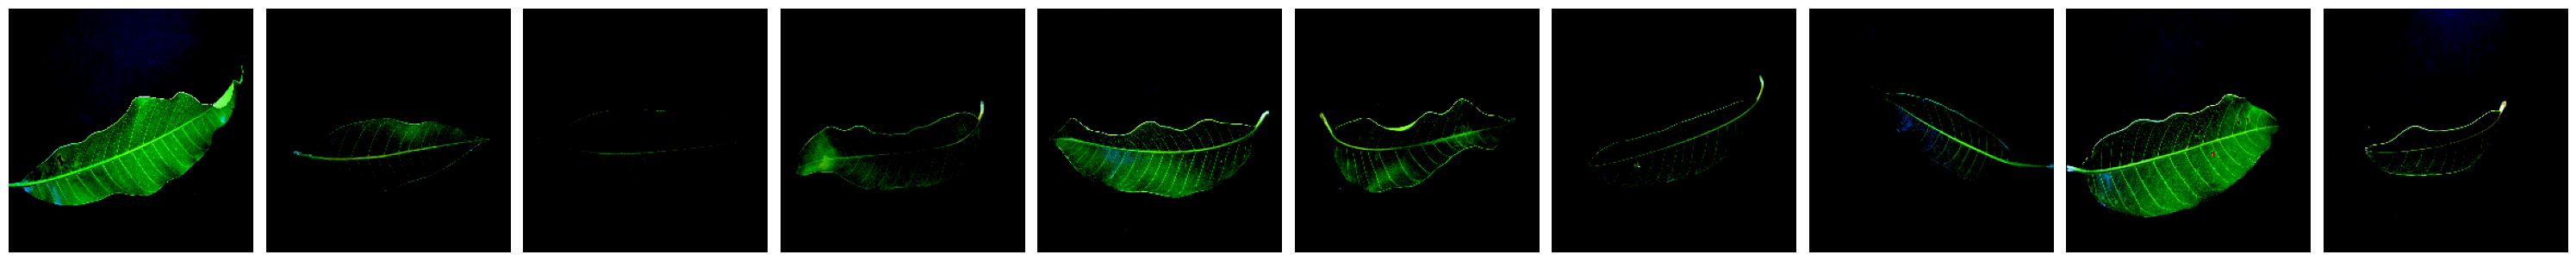

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [27]:
#To Visualize The Data
imgs, labels = next(train_batches)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

### Step (2): Define the CNN Architecture:



*   Use DenseNet169 pretrained model method from Keras website to define the model architecture.
*   change number of classes to 2.
*   set the classifier_activation to "softmax".

https://keras.io/api/applications/densenet/#densenet169-function



In [45]:
keras.applications.DenseNet121(
    include_top=False,
    input_tensor=,
    input_shape=,
    pooling=None,
    classes=2,
    classifier_activation="softmax",
    name="densenet121",
)

ValueError: `input_shape` must be a tuple of three integers.

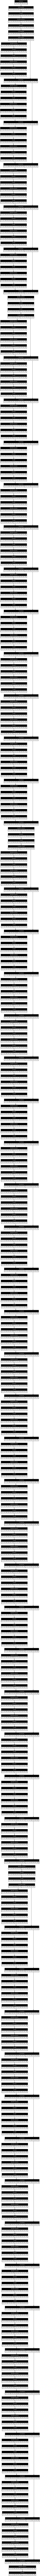

In [40]:
keras.utils.plot_model(model, "MyCNN.png", show_shapes=True)

### Step (3): the Compilation Step of the Model:

1. Set the optimizer to: rmsprop.
2. set the loss to: "categorical_crossentropy".
3. set the evaluation metrics to: "accuracy".

In [41]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [42]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=30)

Epoch 1/30


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 2), output.shape=(None, 7, 7, 1024)

### Step (4): Training "Fitting" the model:

In [37]:
history = model.fit(
    x=train_batches,
    validation_data=valid_batches,
    epochs=10,
    verbose=1
)
model.save(model_path + "Mango_model_Pretrained.keras")

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 2), output.shape=(None, 7, 7, 1024)

In [32]:

trainloss = history.history["loss"]
validloss = history.history["val_loss"]


epochs = range(1, len(trainloss) + 1)
plt.plot(epochs, trainloss, "-", label="Training loss")
plt.plot(epochs, validloss, "--", label="Validation loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
trainaccuracy = history.history["accuracy"]
validaccuracy = history.history["val_accuracy"]


epochs = range(1, len(trainaccuracy) + 1)
plt.plot(epochs, trainaccuracy, "-", label="Training Accuracy")
plt.plot(epochs, validaccuracy, "--", label="Validation Accuracy")

plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Image classification using pretrained model

### Step (5): using the model to make predictions and evaluate it on the testing dataset:

In [ ]:
#Loading the model:
from keras.models import load_model
# returns a compiled model
# identical to the previous one
model = load_model(model_path + "Mango_model_Pretrained.keras")

In [ ]:
model.evaluate(test_batches)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_imgs, test_labels = next(test_batches)
test_labels = np.argmax(test_labels, axis=-1)
predictions = model.predict(test_imgs, verbose=2)
predictions = np.argmax(predictions, axis=-1)




In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predictions)

cm_plot_labels = ["healthy", "diseased"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')